# Applying HPM table  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-HPM-table" data-toc-modified-id="Generate-HPM-table-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate HPM table</a></span></li><li><span><a href="#Load-dark-matter-only-simulation" data-toc-modified-id="Load-dark-matter-only-simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dark matter only simulation</a></span></li><li><span><a href="#Compute-$f_{\rm-scalar}$" data-toc-modified-id="Compute-$f_{\rm-scalar}$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compute $f_{\rm scalar}$</a></span></li></ul></div>

## Generate HPM table

The HPM table is generated by running HYPER once, which spits out HPM tables in redshift intervals.

We  

&nbsp;&nbsp;&nbsp;&nbsp;<code style="background:#E9EEF7"> $output/hpm/hpm_table_z=${redshift}.dat
</code>


## Load dark matter only simulation

The simulation maps are downloaded from

https://app.globus.org/file-manager?origin_id=1910cb10-4ba8-11ec-a516-b537d6c07c1d&origin_path=%2F

We specifically down load the 'CV' == 'cosmic variance' DM-only maps. 

&nbsp;&nbsp;&nbsp;&nbsp;<code style="background:#E5E5E5">Maps_Mcdm_IllustrisTNG_CV_z=0.00.npy</code>

This file is a ```405 x 256 x 256``` numpy file, where the first dimension is the seed number and the other two dimensions are the image dimension. 

In [1]:
a=np.load('/lcrc/project/SPT3G/users/ac.yomori/sims/camels/2d_maps/Maps_Mcdm_IllustrisTNG_CV_z=0.00.npy')

Text(0, 0.5, '$y$-pixel')

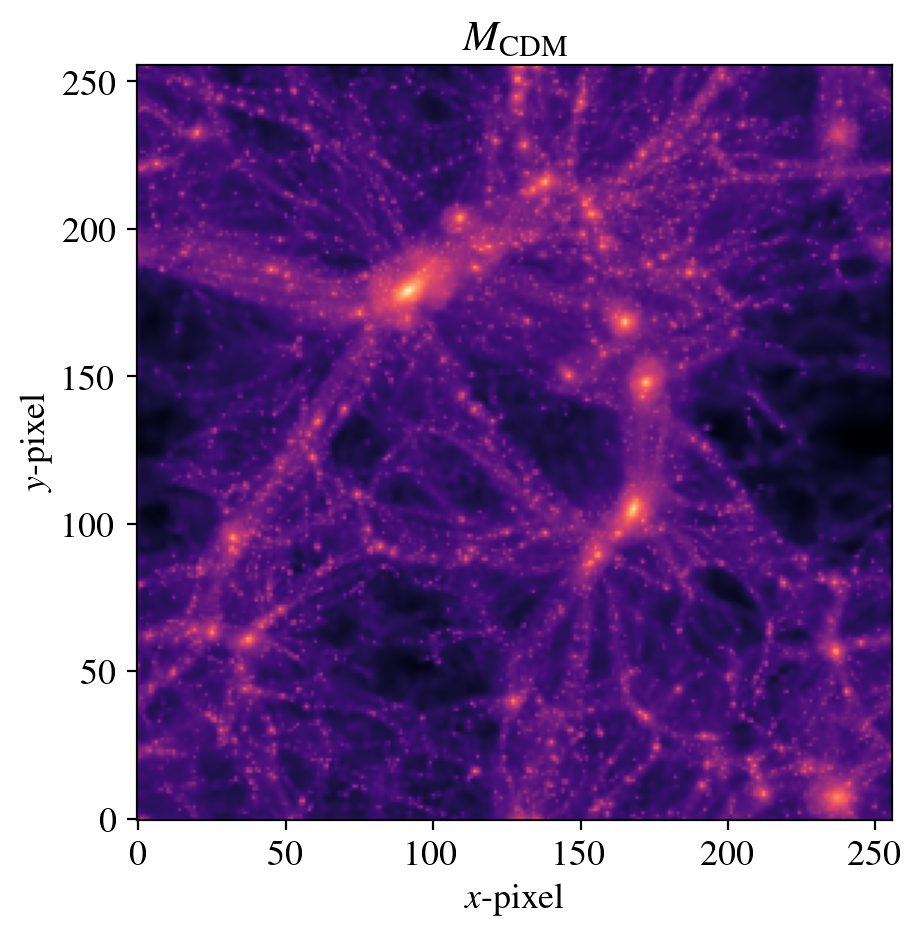

In [46]:
avg=np.mean(a[0,:,:])
plt.imshow( np.log10(a[0,:,:]),origin='lower',cmap='magma')
plt.title(r'$M_{\rm CDM}$')
plt.xlabel(r'$x$-pixel')
plt.ylabel(r'$y$-pixel')


## Compute $f_{\rm scalar}$

We compute $f_{\rm scalar}$ by taking the fft of the density field and using:

$$
f_{\rm scalar}(\vec{k})=\frac{2\pi^2G\rho_{\rm m}(\vec{k})}{k}
$$

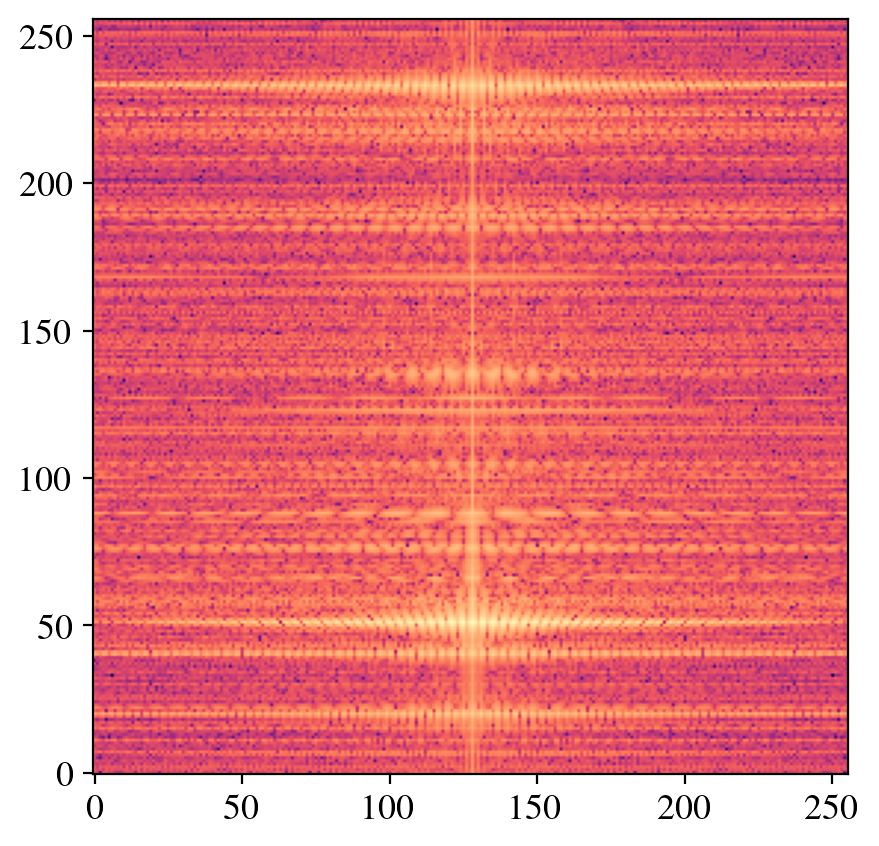

In [34]:
plt.imshow( np.log(np.abs(np.fft.fftshift(np.fft.fft(a[0,:,:])).real)**2) ,origin='lower',cmap='magma')

In [96]:
# Convert from mass/pixel to overdensity
avg    = np.mean(a[0,1:,1:])
rhom   = (a[0,1:,1:]-avg)/avg

# Fourier space
F_rhom = np.fft.fftshift(np.fft.fft(rhom))

# Eq.28 of He2022
xres   = 25./F_rhom.shape[0] #Mpc/h
yres   = 25./F_rhom.shape[1] #Mpc/h

lx_1d = np.fft.fftfreq(F_rhom.shape[0], xres)# h/Mpc
ly_1d = np.fft.fftfreq(F_rhom.shape[1], yres)# h/Mpc
kgrid = np.meshgrid(lx_1d, ly_1d)
kgrid[0]=np.fft.fftshift(kgrid[0],axes=1)
kgrid[1]=np.fft.fftshift(kgrid[1],axes=0)

G = 6.67e-11 * (3.24e-23)**3 * 1.99e30 * 3.1536e16 # mpc^3/Msun/s/Gyr
F_fscalar = 2*np.pi**2*G*F_rhom/(kgrid[0]**2+kgrid[1]**2)**0.5

# Convert back to pixel space
R_fscalar = np.fft.ifft(np.fft.ifftshift(F_fscalar))

/tmp/ipykernel_2349161/3807584172.py:19: RuntimeWarning: divide by zero encountered in true_divide
  F_fscalar = 2*np.pi**2*G*F_rhom/(kgrid[0]**2+kgrid[1]**2)**0.5
/tmp/ipykernel_2349161/3807584172.py:19: RuntimeWarning: invalid value encountered in true_divide
  F_fscalar = 2*np.pi**2*G*F_rhom/(kgrid[0]**2+kgrid[1]**2)**0.5


Text(0, 0.5, '$y$-pixel')

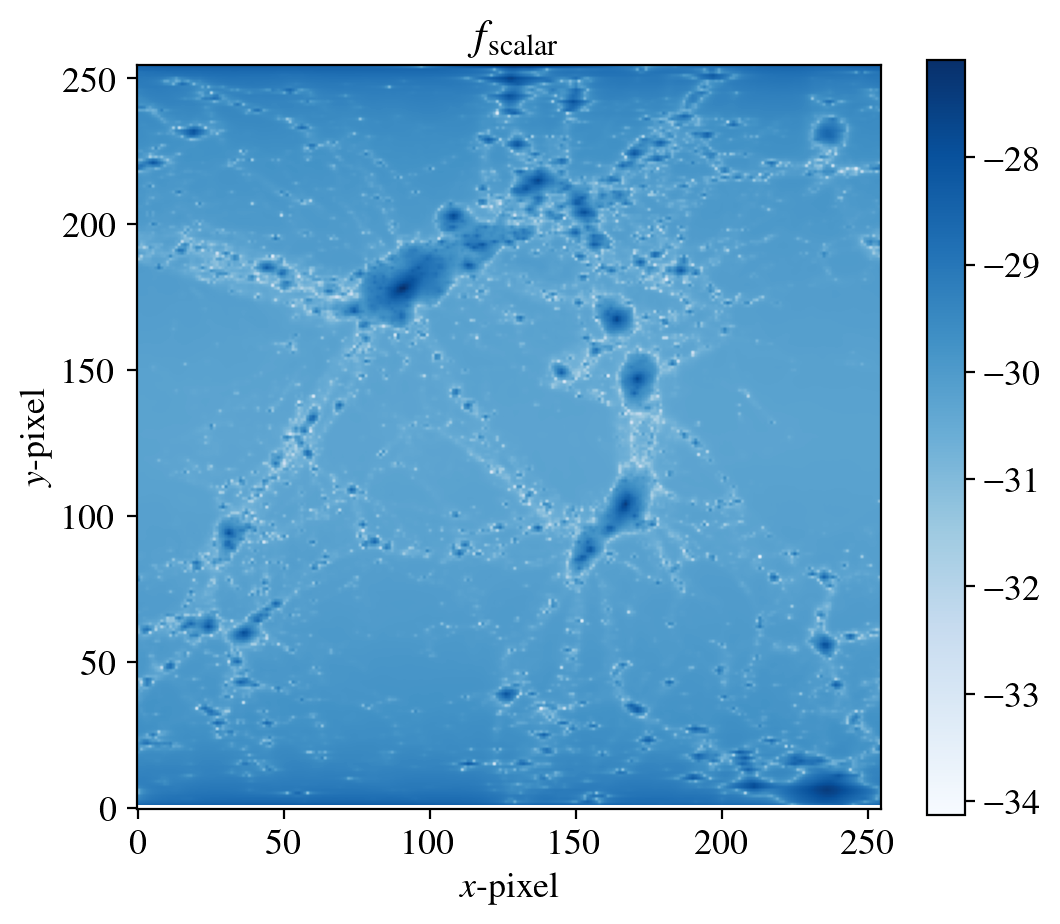

In [97]:
plt.imshow(np.log10(np.abs(R_fscalar.real)),origin='lower',cmap='Blues')
plt.colorbar()
plt.title(r"$f_{\rm scalar}$")
plt.xlabel(r'$x$-pixel')
plt.ylabel(r'$y$-pixel')
